In [1]:
%run Quandl_API.ipynb

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Getting Stock Price

In [40]:
AAPL = quandl.get("XNAS/AAPL_UADJ", 
                  start_date = '2017-12-01',
                 end_date = '2018-12-31',
                 collapse = 'monthly')

In [41]:
AAPL

,Open,High,Low,Close,Volume,Adjustment Factor,Adjustment Type
Date,,,,,,,
2017-12-31,170.28,170.570,169.22,169.23,8457697.0,NaN,NaN
2018-01-31,166.95,168.440,166.50,167.43,9609536.0,NaN,NaN
2018-02-28,179.20,180.610,178.05,178.12,9795284.0,0.995939,17.0
2018-03-31,167.78,167.780,167.78,167.78,0.0,NaN,NaN
2018-04-30,162.19,167.250,161.84,165.26,11884243.0,NaN,NaN
2018-05-31,187.20,188.230,186.14,186.87,10197110.0,0.996159,17.0
2018-06-30,186.38,187.185,182.91,185.11,8034084.0,NaN,NaN
2018-07-31,190.31,192.140,189.35,190.29,11269928.0,NaN,NaN
2018-08-31,226.64,228.870,226.23,227.63,13167931.0,0.996505,17.0


# Getting US Treasury Securities (%)

In [42]:
ten_year = quandl.get("FRED/DGS10",
                     start_date = '2018-01-01',
                     end_date = '2018-12-31',
                     collapse = 'monthly')

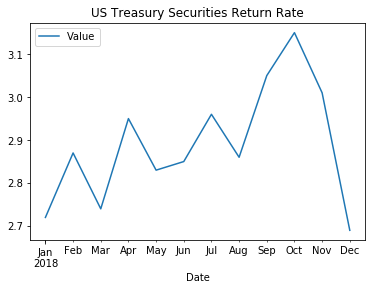

In [77]:
ten_year.plot(title = 'US Treasury Securities Return Rate')

# Calculating Monthly Return Rate of Stock (Close)

In [44]:
AAPL_Close = AAPL.Close

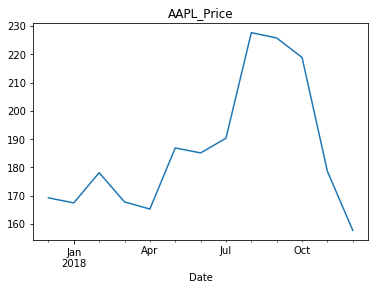

In [75]:
AAPL_Close.plot(title = 'AAPL_Price')

In [46]:
AAPL_Close[1:]

Date
2018-01-31    167.43
2018-02-28    178.12
2018-03-31    167.78
2018-04-30    165.26
2018-05-31    186.87
2018-06-30    185.11
2018-07-31    190.29
2018-08-31    227.63
2018-09-30    225.74
2018-10-31    218.86
2018-11-30    178.58
2018-12-31    157.74
Name: Close, dtype: float64

In [47]:
AAPL_Close[:-1]

Date
2017-12-31    169.23
2018-01-31    167.43
2018-02-28    178.12
2018-03-31    167.78
2018-04-30    165.26
2018-05-31    186.87
2018-06-30    185.11
2018-07-31    190.29
2018-08-31    227.63
2018-09-30    225.74
2018-10-31    218.86
2018-11-30    178.58
Name: Close, dtype: float64

In [89]:
date = AAPL_Close[1:].index

In [90]:
AAPL_Monthly_ReturnRate = pd.Series(((AAPL_Close[1:].values - AAPL_Close[:-1].values) / AAPL_Close[:-1].values)*100, index = date)

In [91]:
AAPL_Monthly_ReturnRate

Date
2018-01-31    -1.063641
2018-02-28     6.384758
2018-03-31    -5.805075
2018-04-30    -1.501967
2018-05-31    13.076365
2018-06-30    -0.941831
2018-07-31     2.798336
2018-08-31    19.622681
2018-09-30    -0.830295
2018-10-31    -3.047754
2018-11-30   -18.404459
2018-12-31   -11.669840
dtype: float64

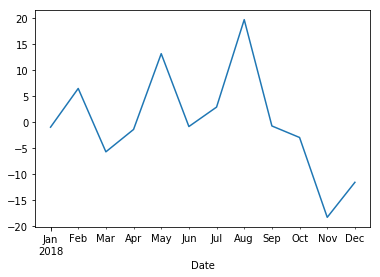

In [93]:
AAPL_Monthly_ReturnRate.plot()

In [92]:
len(AAPL_Monthly_ReturnRate)

12

# Calculating Sharpe Ratio

In [113]:
pd.DataFrame(AAPL_Monthly_ReturnRate, columns = ['Value'])

,Value
Date,
2018-01-31,-1.063641
2018-02-28,6.384758
2018-03-31,-5.805075
2018-04-30,-1.501967
2018-05-31,13.076365
2018-06-30,-0.941831
2018-07-31,2.798336
2018-08-31,19.622681
2018-09-30,-0.830295


In [107]:
ten_year

,Value
Date,
2018-01-31,2.72
2018-02-28,2.87
2018-03-31,2.74
2018-04-30,2.95
2018-05-31,2.83
2018-06-30,2.85
2018-07-31,2.96
2018-08-31,2.86
2018-09-30,3.05


In [94]:
difference = AAPL_Monthly_ReturnRate - ten_year.Value.values

In [114]:
pd.DataFrame(difference)

,0
Date,
2018-01-31,-3.783641
2018-02-28,3.514758
2018-03-31,-8.545075
2018-04-30,-4.451967
2018-05-31,10.246365
2018-06-30,-3.791831
2018-07-31,-0.161664
2018-08-31,16.762681
2018-09-30,-3.880295


In [115]:
difference.mean()

-3.0052269198216597

In [116]:
difference.std()

10.13438619727799

In [117]:
difference.mean() / difference.std()

-0.2965376354641821